<a href="https://colab.research.google.com/github/Kedar154/Australia_Weather_Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset

In [173]:
pip install opendatasets

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline
import opendatasets as od

In [175]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [176]:
data = pd.read_csv('/content/weather-dataset-rattle-package/weatherAUS.csv')

In [177]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Cleaning Dataset

In [178]:
data.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [226]:
num_df = data.select_dtypes(include = np.number)
cat_df = data.select_dtypes(exclude = np.number)
cat_df = cat_df.drop(['Date'], axis = 1)
print(num_df)
print(cat_df)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

### Numeric columns

#### Replacing Nulls with AVG

##### Using .fillna()

In [180]:
use_fillna = True

In [181]:
if use_fillna:
  print(num_df.isna().sum())
  num_df1 = num_df.fillna(num_df.mean())
  print(num_df1)

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0     5.472516   7.63054           31.0   
145455     

##### Using Sklearn's SimpleImputer

In [182]:
use_simp_imp = False

In [183]:
if use_simp_imp:
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(strategy = 'mean')
  imputer.fit(num_df)

  print(imputer.statistics_)
  num_df1 = imputer.transform(num_df).set_output(transform = 'pandas')
  print(num_df1)

#### Rescaling the numeric data

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform = 'pandas')
scaler.fit(num_df1)
num_df2 = scaler.transform(num_df1)
print(num_df2)

         MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  \
0       0.190073 -0.047155 -0.206727 -2.793627e-16  3.239895e-16   
1      -0.748424  0.262411 -0.277606 -2.793627e-16  3.239895e-16   
2       0.111865  0.346838 -0.277606 -2.793627e-16  3.239895e-16   
3      -0.466875  0.670476 -0.277606 -2.793627e-16  3.239895e-16   
4       0.831379  1.275538 -0.159474 -2.793627e-16  3.239895e-16   
...          ...       ...       ...           ...           ...   
145454 -1.358446 -0.201939 -0.277606 -2.793627e-16  3.239895e-16   
145455 -1.467938  0.023201 -0.277606 -2.793627e-16  3.239895e-16   
145456 -1.342805  0.290553 -0.277606 -2.793627e-16  3.239895e-16   
145457 -1.061256  0.515693 -0.277606 -2.793627e-16  3.239895e-16   
145458 -0.685857  0.529764 -0.277606 -2.793627e-16  3.239895e-16   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0            0.306850      0.678824      0.615792     0.114615    -1.433272   
1            0.306850    

### Catagorical columns

In [185]:
cat_df.info()
cat_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Location      140787 non-null  object
 1   WindGustDir   131624 non-null  object
 2   WindDir9am    131127 non-null  object
 3   WindDir3pm    137117 non-null  object
 4   RainToday     140787 non-null  object
 5   RainTomorrow  140787 non-null  object
dtypes: object(6)
memory usage: 7.5+ MB


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,140787,131624,131127,137117,140787,140787
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3402,9696,11266,10578,109332,109586


#### Using Sklearn's LabelEncoder

In [186]:
use_labelenc = False

In [225]:

# dont use label encoding as it assigns a number to each non numeric value, this establishes a relation between them
#it can only be used where we have ordinal relation between the non numeric data like small medium large or slow steady fast

if use_labelenc:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  cat_df1 = cat_df.apply(le.fit_transform)
  print(cat_df1)

#### Using Sklearn's OneHotEncoder

In [188]:
use_onehotenc = True

In [227]:
if use_onehotenc:
  from sklearn.preprocessing import OneHotEncoder
  ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').set_output(transform = 'pandas')
  ohe.fit(cat_df)
  cat_df1 = ohe.transform(cat_df)
  print(cat_df1)

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2              

#### Using .get_dummies()

In [190]:
use_get_dummy = False

In [191]:
if use_get_dummy:
  cat_df2 = pd.get_dummies(cat_df).astype(int)
  print(cat_df2)

## Test Train Split

In [192]:
print(cat_df1.describe())
print(num_df2.describe())
print(cat_df1.info())
print(num_df2.info())

       Location_Adelaide  Location_Albany  Location_Albury  \
count      140787.000000    140787.000000    140787.000000   
mean            0.021451         0.021280         0.021245   
std             0.144882         0.144318         0.144200   
min             0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000   
75%             0.000000         0.000000         0.000000   
max             1.000000         1.000000         1.000000   

       Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
count          140787.000000           140787.000000      140787.000000   
mean                0.021486                0.020435           0.021430   
std                 0.144999                0.141484           0.144812   
min                 0.000000                0.000000           0.000000   
25%                 0.000000                0.000000           0.0

In [193]:
dates = pd.DataFrame(data['Date'])
data_clean = pd.concat([num_df2, cat_df1], axis = 1).drop(columns = ['RainTomorrow_No', 'RainToday_No'])
#data_clean.to_csv('Cleaned_Data.csv')
print(data_clean.head())

    MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  WindGustSpeed  \
0  0.190073 -0.047155 -0.206727 -2.793627e-16  3.239895e-16       0.306850   
1 -0.748424  0.262411 -0.277606 -2.793627e-16  3.239895e-16       0.306850   
2  0.111865  0.346838 -0.277606 -2.793627e-16  3.239895e-16       0.459153   
3 -0.466875  0.670476 -0.277606 -2.793627e-16  3.239895e-16      -1.216176   
4  0.831379  1.275538 -0.159474 -2.793627e-16  3.239895e-16       0.078396   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0      0.678824      0.615792     0.114615    -1.433272  ...            0.0   
1     -1.128510      0.386398    -1.309391    -1.287264  ...            0.0   
2      0.565865      0.845186    -1.625837    -1.043919  ...            0.0   
3     -0.337801     -1.104663    -1.256650    -1.725287  ...            0.0   
4     -0.789635      0.157004     0.694765    -0.897911  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDi

In [194]:
dates['Date'] = pd.to_datetime(dates['Date'])
year = dates['Date'].dt.year
data_dates = pd.concat([year, data_clean], axis = 1)
px.histogram(year,
             x= 'Date').update_layout(bargap = 0.1)

### Using Sklearn

In [195]:
use_sklearn = False

In [196]:
if use_sklearn:
  from sklearn.model_selection import train_test_split
  train_df, test_df = train_test_split(data_clean, test_size = .2, random_state = 42)
  train_df, val_df = train_test_split(train_df, test_size = .2, random_state = 42)

in the training set we only want data from past and in the testing set we want data from the future

we should not use data from future to predict the past

### Manual Split

In [197]:
use_manual_split = True

In [198]:
print(data_dates)

        Date   MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  \
0       2008  0.190073 -0.047155 -0.206727 -2.793627e-16  3.239895e-16   
1       2008 -0.748424  0.262411 -0.277606 -2.793627e-16  3.239895e-16   
2       2008  0.111865  0.346838 -0.277606 -2.793627e-16  3.239895e-16   
3       2008 -0.466875  0.670476 -0.277606 -2.793627e-16  3.239895e-16   
4       2008  0.831379  1.275538 -0.159474 -2.793627e-16  3.239895e-16   
...      ...       ...       ...       ...           ...           ...   
145454  2017 -1.358446 -0.201939 -0.277606 -2.793627e-16  3.239895e-16   
145455  2017 -1.467938  0.023201 -0.277606 -2.793627e-16  3.239895e-16   
145456  2017 -1.342805  0.290553 -0.277606 -2.793627e-16  3.239895e-16   
145457  2017 -1.061256  0.515693 -0.277606 -2.793627e-16  3.239895e-16   
145458  2017 -0.685857  0.529764 -0.277606 -2.793627e-16  3.239895e-16   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
0            0.306850      0.678824     

In [199]:
if use_manual_split:
  train_df = data_dates[data_dates['Date']<2015].drop(columns = ['Date'])
  val_df = data_dates[data_dates['Date']==2015].drop(columns =  ['Date'])
  test_df = data_dates[data_dates['Date']>2015].drop(columns =  ['Date'])

In [200]:
print(train_df.head())
print(val_df.head())
print(test_df.head())

    MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  WindGustSpeed  \
0  0.190073 -0.047155 -0.206727 -2.793627e-16  3.239895e-16       0.306850   
1 -0.748424  0.262411 -0.277606 -2.793627e-16  3.239895e-16       0.306850   
2  0.111865  0.346838 -0.277606 -2.793627e-16  3.239895e-16       0.459153   
3 -0.466875  0.670476 -0.277606 -2.793627e-16  3.239895e-16      -1.216176   
4  0.831379  1.275538 -0.159474 -2.793627e-16  3.239895e-16       0.078396   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0      0.678824      0.615792     0.114615    -1.433272  ...            0.0   
1     -1.128510      0.386398    -1.309391    -1.287264  ...            0.0   
2      0.565865      0.845186    -1.625837    -1.043919  ...            0.0   
3     -0.337801     -1.104663    -1.256650    -1.725287  ...            0.0   
4     -0.789635      0.157004     0.694765    -0.897911  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDi

In [201]:
train_df.to_csv('Training_Data.csv')
test_df.to_csv('Testing_Data.csv')
val_df.to_csv('Validation_Data.csv')

In [222]:
num_cols = num_df2.columns
cat_cols = cat_df1.columns

## Logistic Regression Model

### Training

In [202]:
train_inp = train_df.drop(columns = 'RainTomorrow_Yes')
train_out = train_df['RainTomorrow_Yes']
val_inp = val_df.drop(columns = 'RainTomorrow_Yes')
val_out = val_df['RainTomorrow_Yes']
test_inp = test_df.drop(columns = 'RainTomorrow_Yes')
test_out = test_df['RainTomorrow_Yes']
print(train_inp.head())
print(train_out.head())

    MinTemp   MaxTemp  Rainfall   Evaporation      Sunshine  WindGustSpeed  \
0  0.190073 -0.047155 -0.206727 -2.793627e-16  3.239895e-16       0.306850   
1 -0.748424  0.262411 -0.277606 -2.793627e-16  3.239895e-16       0.306850   
2  0.111865  0.346838 -0.277606 -2.793627e-16  3.239895e-16       0.459153   
3 -0.466875  0.670476 -0.277606 -2.793627e-16  3.239895e-16      -1.216176   
4  0.831379  1.275538 -0.159474 -2.793627e-16  3.239895e-16       0.078396   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0      0.678824      0.615792     0.114615    -1.433272  ...           0.0   
1     -1.128510      0.386398    -1.309391    -1.287264  ...           0.0   
2      0.565865      0.845186    -1.625837    -1.043919  ...           0.0   
3     -0.337801     -1.104663    -1.256650    -1.725287  ...           0.0   
4     -0.789635      0.157004     0.694765    -0.897911  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_S

In [203]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(train_inp, train_out)

LogisticRegression(solver='liblinear')

In [204]:
w_b = pd.DataFrame({
    'feature': train_inp.columns,
    'coef': model.coef_[0]
})
intercept = pd.DataFrame({
    'feature': ['intercept'],
    'coef': [model.intercept_[0]]
})
w_b = pd.concat([w_b, intercept], ignore_index = True)
print(w_b)

            feature      coef
0           MinTemp  0.153948
1           MaxTemp -0.489993
2          Rainfall  0.092115
3       Evaporation  0.031759
4          Sunshine -0.312816
..              ...       ...
113  WindDir3pm_WNW  0.015679
114  WindDir3pm_WSW -0.198127
115  WindDir3pm_nan  0.106856
116   RainToday_Yes  0.489977
117       intercept -1.704340

[118 rows x 2 columns]


<Axes: xlabel='coef', ylabel='feature'>

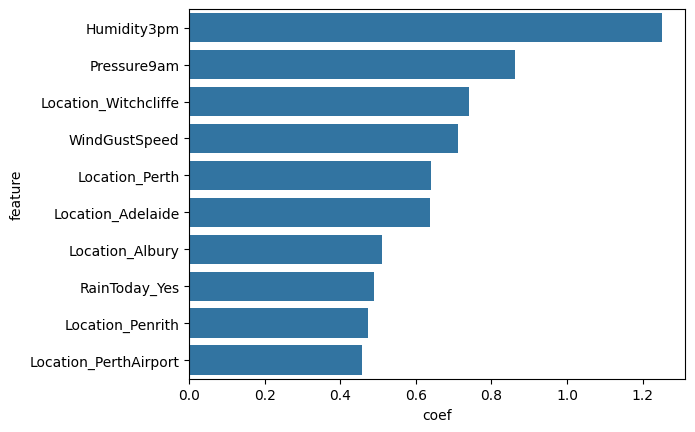

In [205]:
sns.barplot(data = w_b.sort_values('coef', ascending=False).head(10), y = 'feature', x = 'coef')

### Testing

In [206]:
train_pred = model.predict(train_inp)
val_pred = model.predict(val_inp)

For Probabilities

In [207]:
give_prob = False

In [208]:
if give_prob:
  train_pred = model.predict_proba(train_inp)
  print("NO || YES")
  print( train_pred)
  val_pred = model.predict_proba(val_inp)
  print(val_pred)


### Accuracy & Confusion Matrix

In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [210]:

def plott(tar, inp, s):
  pred = model.predict(inp)
  acc_train = accuracy_score(tar, pred)
  print(f"{s} Accuracy: {acc_train}")
  cm_train = confusion_matrix(tar, pred, normalize= 'true') #normalise converts to %
  sns.heatmap(cm_train, annot = True, fmt = '.2%')
  plt.xlabel('Predicted', size = 18)
  plt.ylabel('Actual', size = 18)
  plt.title(f'{s} Confusion Matrix', size = 26)
  plt.show()

Training Accuracy: 0.8521655712944443


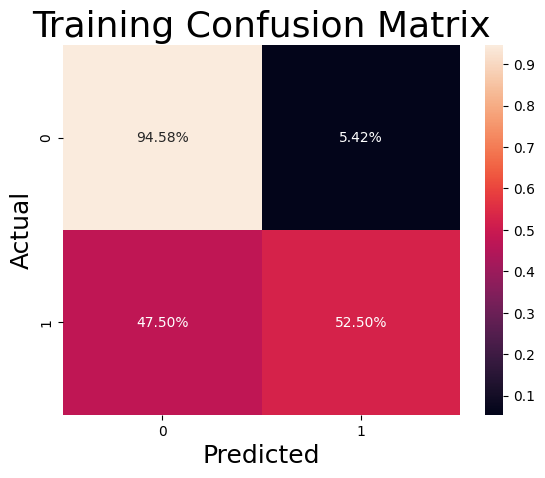

Validation Accuracy: 0.8539996488969512


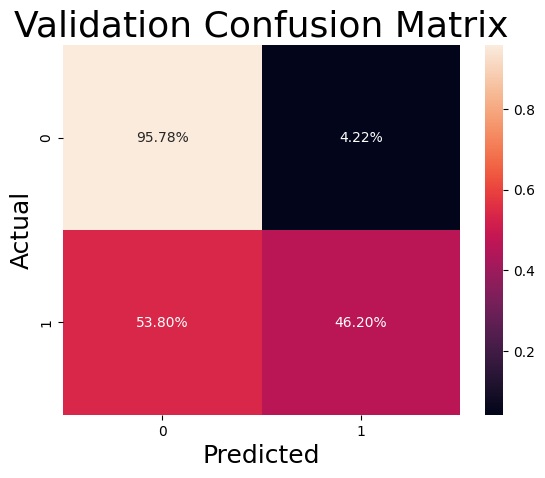

Testing Accuracy: 0.8423959548813691


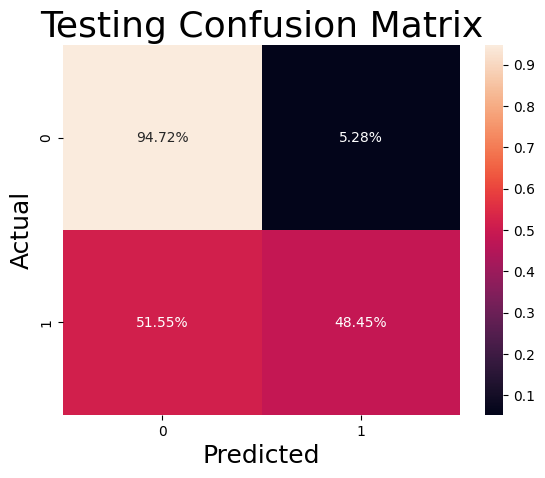

In [211]:
plott(train_out, train_inp, 'Training')
plott(val_out, val_inp, 'Validation')
plott(test_out, test_inp,'Testing')

### Dummy Model

In [212]:
def dummy(tar, pred, s):
  acc_train = accuracy_score(tar, pred)
  print(f"{s} Accuracy: {acc_train}")
  cm_train = confusion_matrix(tar, pred, normalize= 'true') #normalise converts to %
  sns.heatmap(cm_train, annot = True, fmt = '.2%')
  plt.xlabel('Predicted', size = 18)
  plt.ylabel('Actual', size = 18)
  plt.title(f'{s} Confusion Matrix', size = 26)
  plt.show()

#### ALL NO

In [213]:
def all_no(inp):
  all_no = np.zeros(len(inp))
  return all_no

#### Random Guesser

In [214]:
def rnd(inp):
  rnd = np.random.randint(0, 2, len(inp))
  return rnd

All No Accuracy: 0.7775441890843777


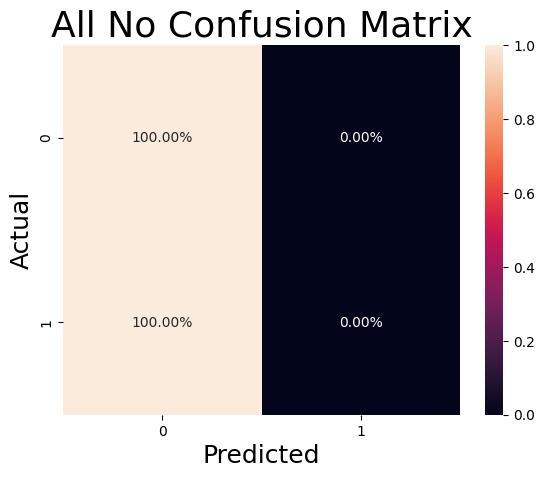

Random Accuracy: 0.4987549495856636


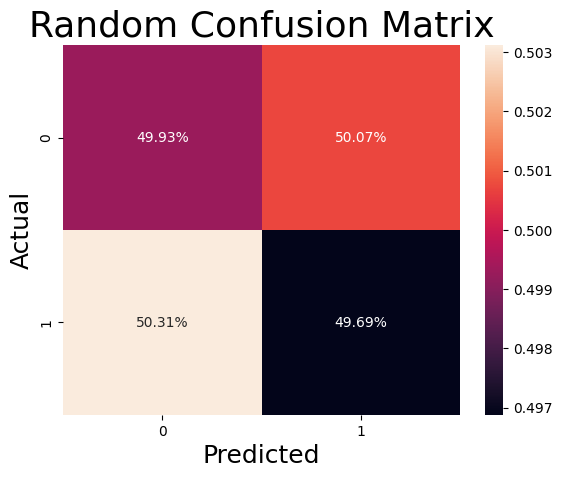

In [215]:
#for dummy models
dummy(train_out, all_no(train_inp), 'All No')
dummy(train_out, rnd(train_inp), 'Random')

### Improvements

In [216]:
model = LogisticRegression(solver = 'liblinear', class_weight='balanced')
#class weight balanced makes the model think equally about rain and not rain even though data is unbalanced
model.fit(train_inp, train_out)

LogisticRegression(class_weight='balanced', solver='liblinear')

Finding Optimum threshold

In [217]:
maxx = 0
error = 1000
for i in np.arange(0.5, 0.53, 0.0005):
  pred = model.predict_proba(train_inp)
  adjusted_pred = (pred[:, 1] >= i).astype(int)
  cm_train = confusion_matrix(train_out, adjusted_pred, normalize= 'true') #normalise converts to %
  if error > cm_train[0,1]+cm_train[1,0]:
    error = cm_train[0,1]+cm_train[1,0]
    maxx = i
    print(f"Threshold: {i}\tError: {error} \nFP: {cm_train[0,1]}\nFN: {cm_train[1,0]}")


Threshold: 0.5	Error: 0.41158095508809844 
FP: 0.19656122850767818
FN: 0.21501972658042023
Threshold: 0.5009999999999999	Error: 0.4113244578202506 
FP: 0.1958918493240583
FN: 0.2154326084961923
Threshold: 0.5014999999999998	Error: 0.4112453352159077 
FP: 0.1955374721092007
FN: 0.21570786310670703


In [218]:
pred = model.predict_proba(train_inp)
print(pred[:, 1])
def threshold(tar, inp, s, thres):
  pred = model.predict_proba(inp)
  adjusted_pred = (pred[:, 1] >= thres).astype(int) #defining a threshold
  acc_train = accuracy_score(tar, adjusted_pred)
  print(f"{s} Accuracy: {acc_train}")
  cm_train = confusion_matrix(tar, adjusted_pred, normalize= 'true') #normalise converts to %
  sns.heatmap(cm_train, annot = True, fmt = '.2%')
  plt.xlabel('Predicted', size = 18)
  plt.ylabel('Actual', size = 18)
  plt.title(f'{s} Confusion Matrix with threshold {thres}', size = 26)
  plt.show()

[0.17393077 0.18283079 0.1116781  ... 0.04335587 0.06169159 0.39164233]


Training Accuracy: 0.7999755072049639


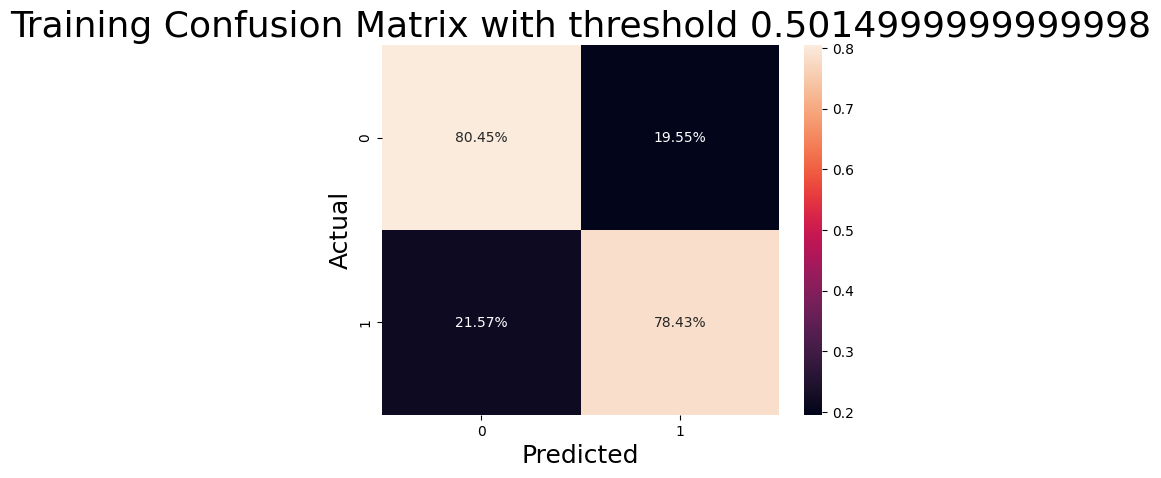

Validation Accuracy: 0.8145005559131605


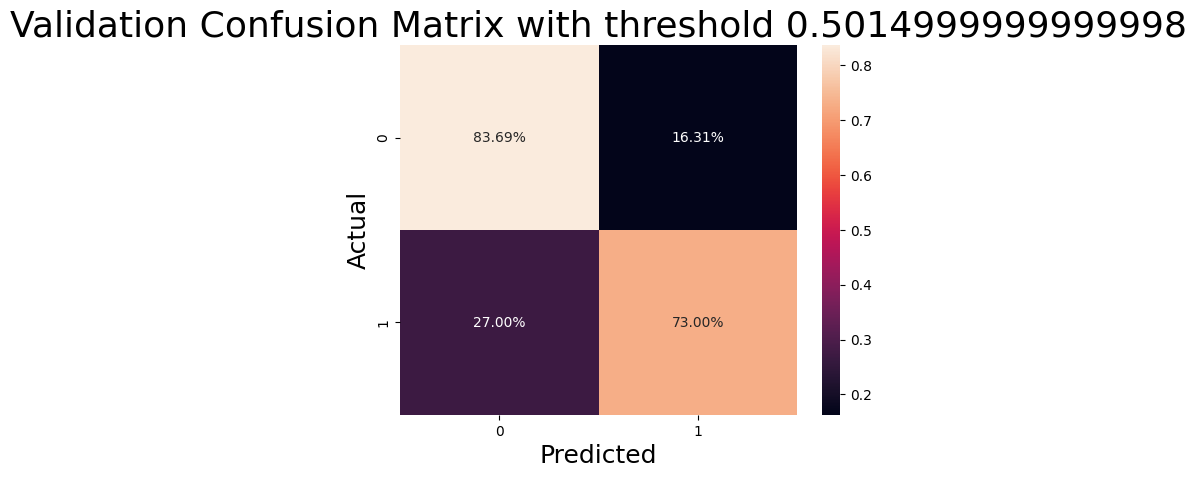

Testing Accuracy: 0.7955659276546091


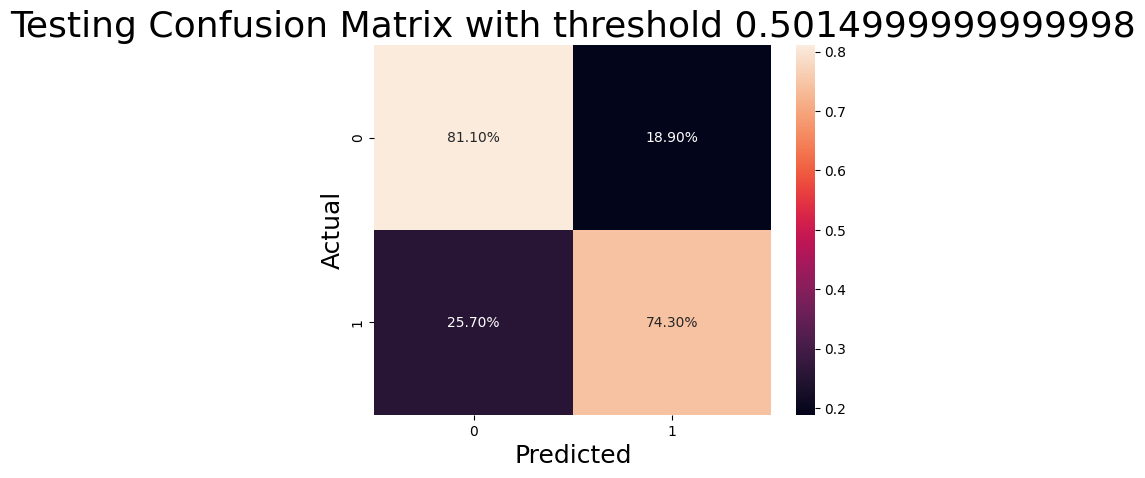

In [219]:
threshold(train_out, train_inp, 'Training', maxx)
threshold(val_out, val_inp, 'Validation', maxx)
threshold(test_out, test_inp, 'Testing', maxx)

## Compilation




In [243]:
row_dict = {
    'Date': '2008-12-01',
    'Location': 'Albury',
    'MinTemp': 13.4,
    'MaxTemp': 22.9,
    'Rainfall': 0.6,
    'Evaporation': float('nan'),
    'Sunshine': float('nan'),
    'WindGustDir': 'W',
    'WindGustSpeed': 44.0,
    'WindDir9am': 'W',
    'WindDir3pm': 'WNW',
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 24.0,
    'Humidity9am': 71.0,
    'Humidity3pm': 22.0,
    'Pressure9am': 1007.7,
    'Pressure3pm': 1007.1,
    'Cloud9am': 8.0,
    'Cloud3pm': float('nan'),
    'Temp9am': 16.9,
    'Temp3pm': 21.8,
    'RainToday': 'No'
}


In [241]:
data_set = pd.DataFrame([row_dict])
data_set['RainTomorrow'] = 'No'
threshold = 0.5014999999999998
num_df0 = data_set.select_dtypes(include = np.number)
cat_df0 = data_set.select_dtypes(exclude = np.number).drop(['Date'], axis = 1)
num_df01 = num_df0.fillna(num_df.mean())
num_df02 = scaler.transform(num_df01)
cat_df01 = ohe.transform(cat_df0)
data_set_clean = pd.concat([num_df02, cat_df01], axis = 1).drop(columns = ['RainTomorrow_No','RainTomorrow_Yes','RainToday_No'])
print(model.predict(data_set_clean)[0]>threshold)
print(model.predict_proba(data_set_clean))


[0.]
[[0.82606923 0.17393077]]


## Exporting Model

In [ ]:
import joblib

In [246]:
aus_rain= {
    'model' : model,
    'mean' : num_df.mean(),
    'scaler' : scaler,
    'ohe' : ohe,
    'num_cols' : num_cols,
    'cat_cols' : cat_cols,
    'threshold' : maxx
}

In [247]:
joblib.dump(aus_rain, 'aus_rain.joblib')

['aus_rain.joblib']

## Summary

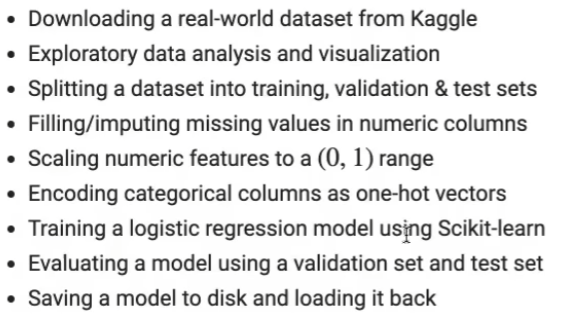